## Importing data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Boston.csv")

In [3]:
data

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import random

## Data Preprocessing

In [7]:
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())
for column in data.columns:
    if(column!="median home price"):
        u = data[column].mean()
        std = data[column].std()
        data[column] = (data[column] - u)

## Linear Regression

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, iterations, train_data, target, method):
        self.iterations = iterations
        data = np.array(train_data)
        self.target = np.array(target)
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.std[self.std == 0] = 1 
        self.train_data = (data - self.mean) / self.std
        self.n = self.train_data.shape[1]
        self.alpha = 0.01  
        self.method = method
    def func(self, coef, intercept, x):
        return np.dot(x, coef) + intercept
    def train(self):
        self.coef = np.zeros(self.n)
        self.intercept = 0.0
        self.errors = []
        if self.method == "batch":
            for t in range(self.iterations):
                preds = np.dot(self.train_data, self.coef) + self.intercept
                residuals = preds - self.target
                coef_gradient = np.dot(self.train_data.T, residuals) / len(self.train_data)
                intercept_gradient = np.mean(residuals)
                self.coef -= self.alpha * coef_gradient
                self.intercept -= self.alpha * intercept_gradient
                self.errors.append(np.mean(residuals**2))     
        else: 
            for t in range(self.iterations):
                idx = random.randint(0, len(self.train_data) - 1)
                x = self.train_data[idx]
                y = self.target[idx]
                pred = self.func(self.coef, self.intercept, x)
                diff = pred - y
                self.coef -= self.alpha * diff * x
                self.intercept -= self.alpha * diff
                current_preds = np.dot(self.train_data, self.coef) + self.intercept
                self.errors.append(np.mean((current_preds - self.target)**2))
        plt.plot(self.errors)
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title(f'Error vs Iterations ({self.method})')
        plt.show()
        return self.coef, self.intercept

## Training models

In [45]:
lr = LinearRegression(1000 , data.drop("median home price" , axis =1) , data["median home price"] , "stochastic")

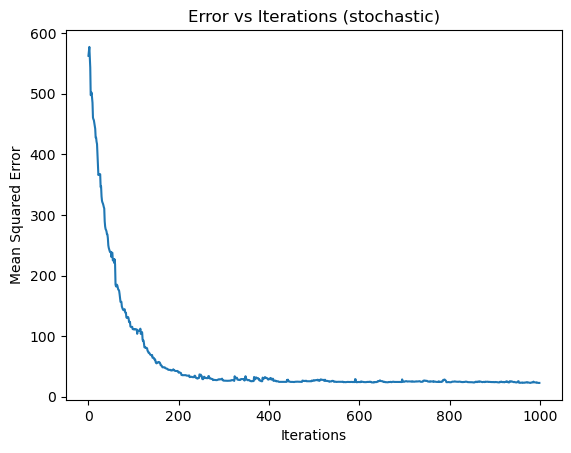

(array([-0.71439762,  0.9132106 , -0.47940847,  0.83678827, -1.24111615,
         3.43125846, -0.32914542, -2.9622735 ,  1.64093386, -1.42480296,
        -1.88910066,  1.31413507, -3.38603919]),
 22.322498333257112)

In [46]:
lr.train()


In [47]:
lr2 = LinearRegression(1000 , data.drop("median home price" , axis =1) , data["median home price"] , "batch")

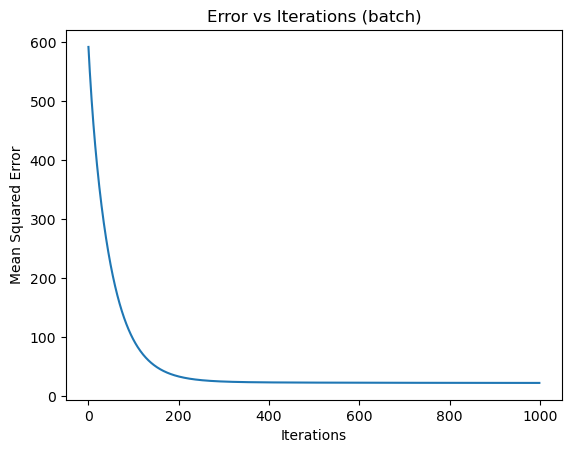

Line equation: 
(-0.78*Crime Rate)+ (0.81*Residential Proportion)+ (-0.27*non-retail business acres/Town)+ (0.74*Charles River)+ (-1.58*NO2 concentration)+ (2.89*Average Rooms/Dwelling.)+ (-0.1*Prior Built Units Proportion)+ (-2.74*Distance to Employment Centres)+ (1.46*Radial Highways Distance)+ (-0.88*ValueProperty/tax rate)+ (-1.95*Teacher/town)+ (0.87*blacks/town)+ (-3.64*Lower Status Percent)+  + 22.5


In [58]:
coefs , intercept = lr2.train()
i = 0
eq = ""
for col in data.drop("median home price" , axis = 1).columns:
    eq += f"({round(coefs[i],2)}*{col})+ "
    i+=1
eq+= f" + {round(intercept,2)}"
print("Line equation: ")
print(eq[:-1])


## Plotting Linear Regression for one dimension

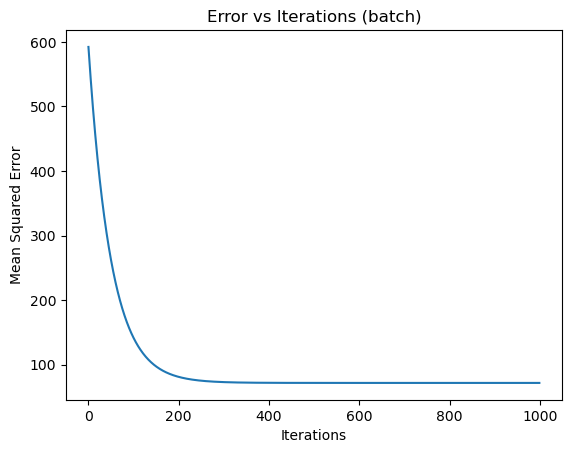

Line Equation: -3.5675932026821333*crime rate + 22.53183355475399


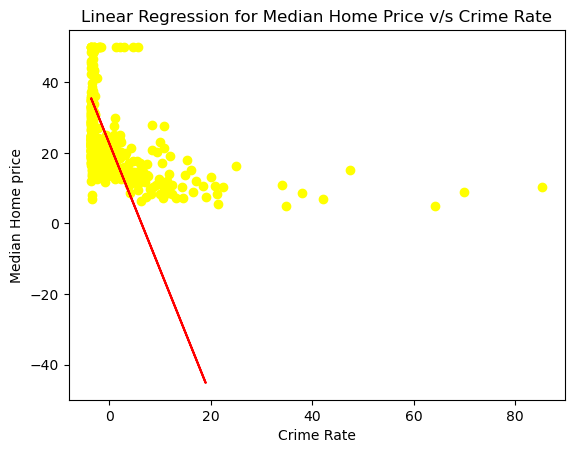

In [72]:
final_lr = LinearRegression(1000 , data[["Crime Rate"]] , data["median home price"] , "batch")
coefs , intercept = final_lr.train()
print(f"Line Equation: {coefs[0]}*crime rate + {intercept}")
plt.scatter(x=data["Crime Rate"] , y = data["median home price"] , color = "yellow")
plt.plot([x for x in data["Crime Rate"] if x<=20] , [coefs[0]*x + intercept for x in data["Crime Rate"] if x<=20] , color = "red")
plt.title("Linear Regression for Median Home Price v/s Crime Rate")
plt.xlabel("Crime Rate")
plt.ylabel("Median Home price")
plt.show()